In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [4]:
t = pd.read_csv('data/covid-worldwide.csv', parse_dates=['dateRep'], dayfirst=True)
t.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-07-12,12,7,2020,85,16,Afghanistan,AF,AFG,38041757.0,Asia,10.081028
1,2020-07-11,11,7,2020,458,37,Afghanistan,AF,AFG,38041757.0,Asia,10.291323
2,2020-07-10,10,7,2020,255,20,Afghanistan,AF,AFG,38041757.0,Asia,9.812901
3,2020-07-09,9,7,2020,59,1,Afghanistan,AF,AFG,38041757.0,Asia,10.351783
4,2020-07-08,8,7,2020,210,16,Afghanistan,AF,AFG,38041757.0,Asia,10.811803


In [5]:
t_russia = t[(t["countriesAndTerritories"] == "Russia") & (t['dateRep'] >= '2020-03-12')  & (t['dateRep'] <= '2020-06-30')].sort_values('dateRep')
t_russia.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
22496,2020-03-12,12,3,2020,15,0,Russia,RU,RUS,145872260.0,Europe,0.015767
22495,2020-03-13,13,3,2020,5,0,Russia,RU,RUS,145872260.0,Europe,0.019195
22494,2020-03-14,14,3,2020,15,0,Russia,RU,RUS,145872260.0,Europe,0.029478
22493,2020-03-15,15,3,2020,14,0,Russia,RU,RUS,145872260.0,Europe,0.039075
22492,2020-03-16,16,3,2020,4,0,Russia,RU,RUS,145872260.0,Europe,0.041817


In [6]:
sc = t_russia.set_index('dateRep')["cases"]

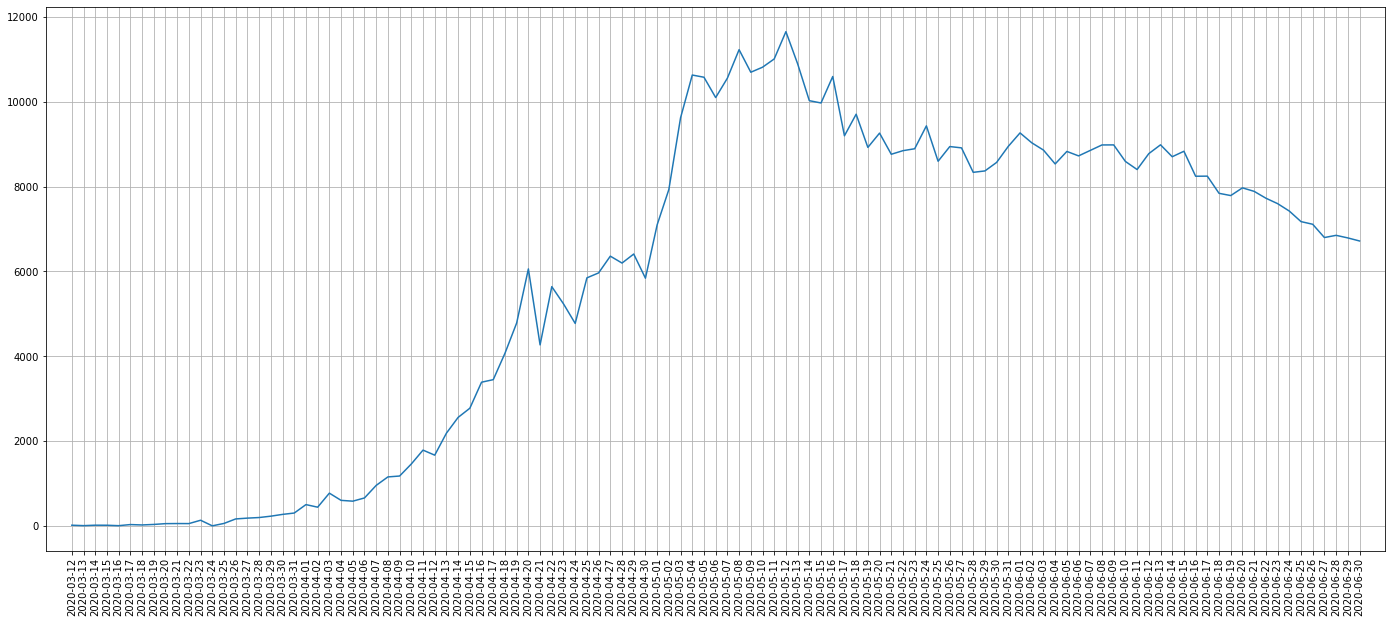

In [26]:
plt.figure(figsize=(24,10))
plt.plot(sc.index, sc)
plt.xticks(sc.index, rotation=90)
plt.margins(x=0.02)
plt.grid(True)
plt.savefig("rusija1.png", formar="png", bbox_inches='tight')
plt.show()

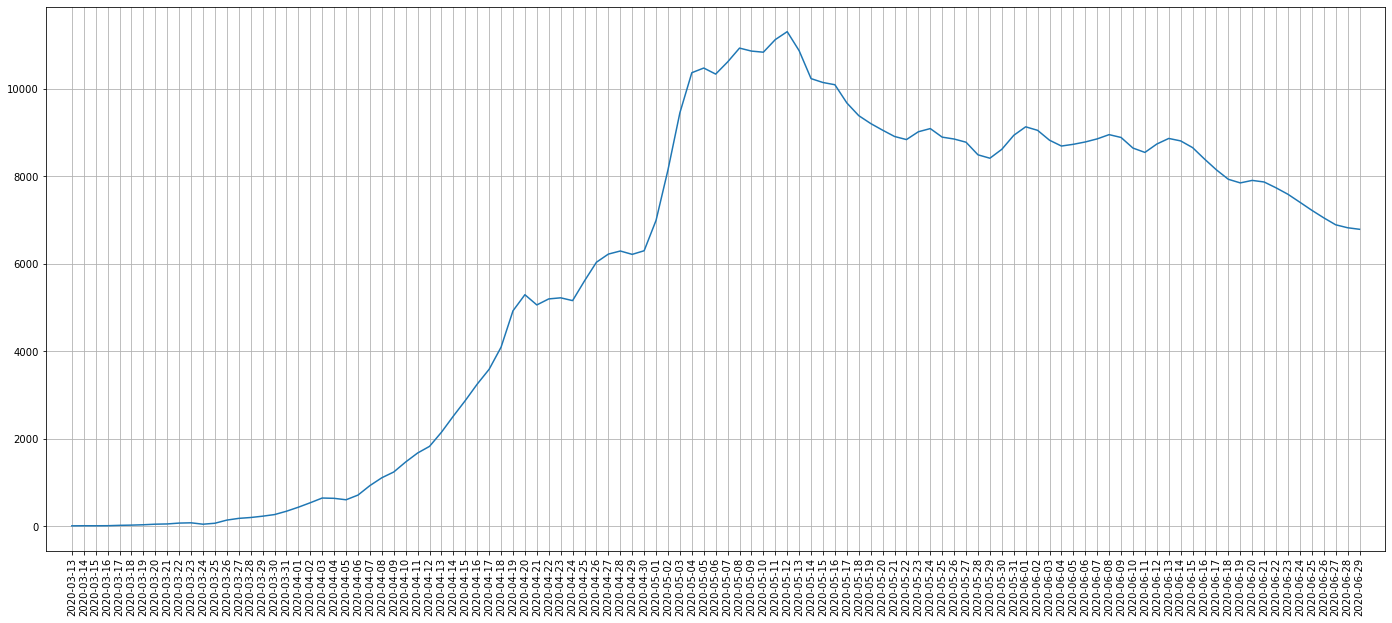

In [25]:

sc1 =  (sc.shift(-1)* 0.25 + sc * 0.5 + sc.shift(1) * 0.25).dropna()
plt.figure(figsize=(24,10))
plt.plot(sc1.index, sc1)
plt.xticks(sc1.index, rotation=90)
plt.margins(x=0.02)
plt.grid(True)
plt.savefig("rusija1s.png", formar="png", bbox_inches='tight')
plt.show()

In [31]:
sc[[0]]

dateRep
2020-03-12    15
Name: cases, dtype: int64

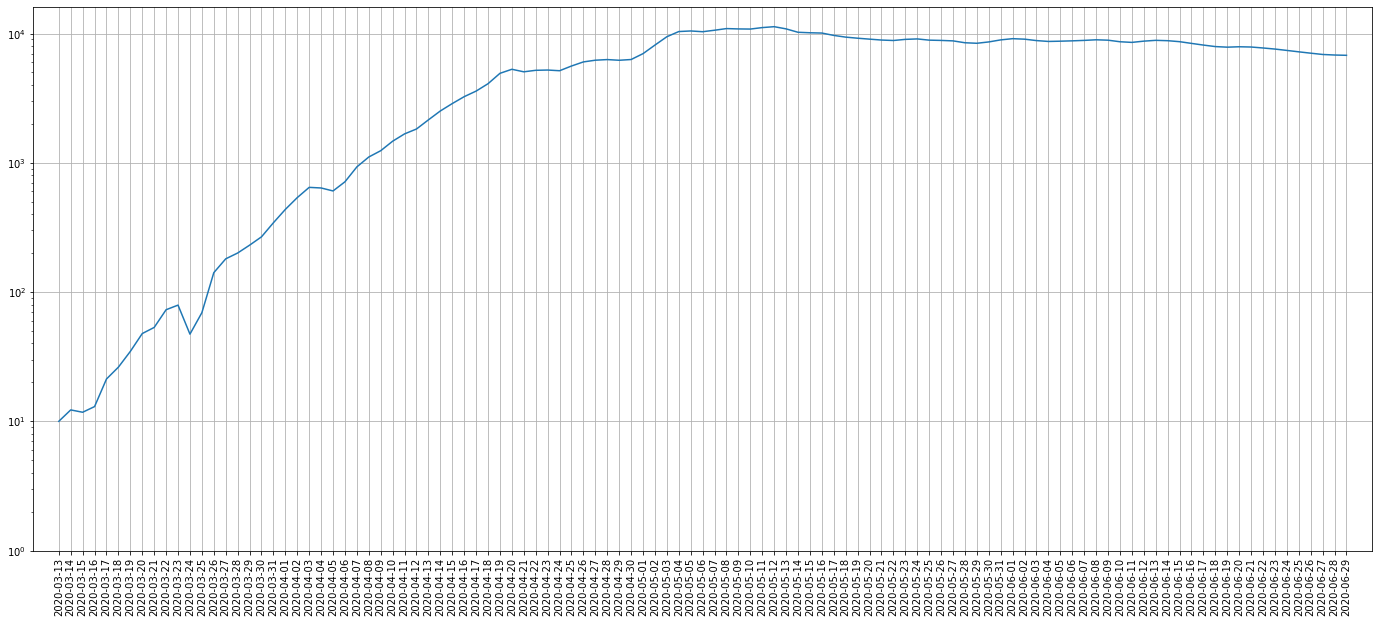

In [23]:
plt.figure(figsize=(24,10))
plt.plot(sc1.index, sc1)
plt.xticks(sc1.index, rotation=90)
plt.yscale("log")
plt.yticks([10**i for i in range(5)])
plt.margins(x=0.02)
plt.grid(True)
plt.savefig("rusija1slog.png", formar="png", bbox_inches='tight')
plt.show()


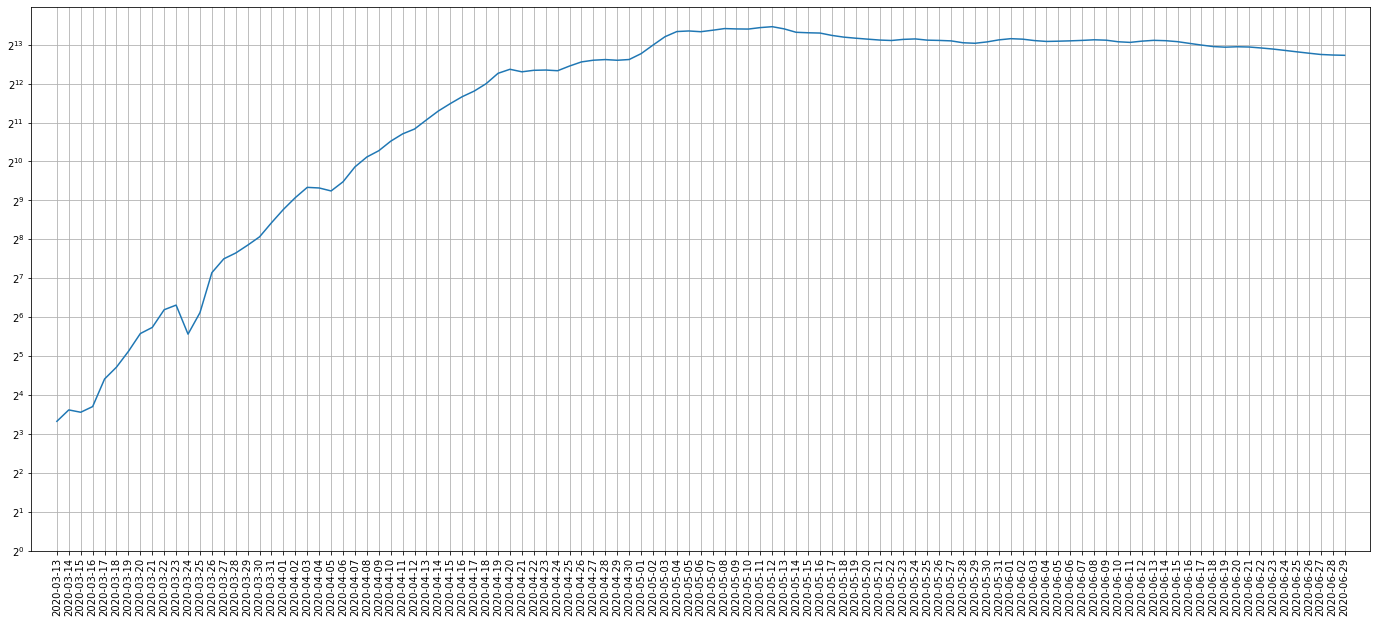

In [24]:
plt.figure(figsize=(24,10))
plt.plot(sc1.index, sc1)
plt.xticks(sc1.index, rotation=90)
plt.yscale("log", basey=2)
plt.yticks([2**i for i in range(14)])
plt.margins(x=0.02)
plt.grid(True)
plt.savefig("rusija1slog2.png", formar="png", bbox_inches='tight')
plt.show()

In [29]:
with open('data/serbia-offitial.json','r',encoding='utf8') as f:
    json_data = json.load(f)

for json_serija in json_data:
    if json_serija["dataCode"] == "BROJ_POZITIVNIH_LICA_ZA_DATI_DATUM":
        print(json_serija)
        v = [stavka["ordinate"] for stavka in serija["points"]]
        i = [stavka["abscissa"]["date"] for stavka in serija["points"]]
        s = pd.Series(v, index=i)
#s['2020-08-30':'2020-09-30']
v

ssa': {'id': None, 'year': 2020, 'month': 5, 'day': 20, 'name': '2020-05-20', 'date': '2020-05-20'}, 'ordinate': 100.0}, {'abscissa': {'id': None, 'year': 2020, 'month': 5, 'day': 21, 'name': '2020-05-21', 'date': '2020-05-21'}, 'ordinate': 86.0}, {'abscissa': {'id': None, 'year': 2020, 'month': 5, 'day': 22, 'name': '2020-05-22', 'date': '2020-05-22'}, 'ordinate': 105.0}, {'abscissa': {'id': None, 'year': 2020, 'month': 5, 'day': 23, 'name': '2020-05-23', 'date': '2020-05-23'}, 'ordinate': 68.0}, {'abscissa': {'id': None, 'year': 2020, 'month': 5, 'day': 24, 'name': '2020-05-24', 'date': '2020-05-24'}, 'ordinate': 67.0}, {'abscissa': {'id': None, 'year': 2020, 'month': 5, 'day': 25, 'name': '2020-05-25', 'date': '2020-05-25'}, 'ordinate': 34.0}, {'abscissa': {'id': None, 'year': 2020, 'month': 5, 'day': 26, 'name': '2020-05-26', 'date': '2020-05-26'}, 'ordinate': 34.0}, {'abscissa': {'id': None, 'year': 2020, 'month': 5, 'day': 27, 'name': '2020-05-27', 'date': '2020-05-27'}, 'ordinat

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 5.26,
 4.76,
 4.35,
 4.35,
 6.9,
 10.53,
 12.5,
 10.91,
 11.27,
 13.64,
 14.43,
 12.8,
 13.82,
 11.82,
 10.0,
 14.9,
 14.67,
 16.62,
 11.48,
 None,
 11.11,
 10.34,
 9.27,
 8.51,
 9.06,
 8.44,
 7.82,
 6.57,
 6.66,
 6.45,
 5.95,
 5.44,
 4.78,
 4.36,
 3.94,
 3.42,
 3.24,
 3.27,
 3.08,
 2.92,
 2.76,
 3.15,
 2.76,
 3.0,
 2.9,
 2.79,
 3.15,
 3.14,
 3.16,
 2.86,
 2.74,
 2.49,
 2.55,
 2.62,
 2.75,
 2.74,
 2.69,
 2.85,
 2.99,
 2.83,
 2.58,
 2.11,
 2.22,
 2.32,
 2.39,
 2.22,
 2.36,
 1.99,
 1.86,
 1.7,
 1.62,
 1.61,
 1.8,
 1.82,
 1.83,
 1.77,
 1.61,
 1.61,
 1.43,
 1.8,
 1.94,
 1.92,
 2.11,
 2.58,
 3.19,
 3.08,
 3.2,
 3.16,
 3.28,
 3.36,
 3.24,
 2.87,
 2.73,
 2.71,
 2.75,
 2.72,
 2.75,
 2.99,
 2.89,
 2.87,
 2.75,
 2.77,
 2.6,
 2.45,
 2.44,
 2.52,
 2.43,
 2.7,
 2.36,
 2.51,
 2.58,
 4.09,
 4.06,
 3.97,
 3.66,
 3.17,
 3.4,
 3.74,
 3.72,
 3.59,
 3.57,
 3.55,
 3.52,
 3.59,
 3.72,
 3.48,
 3.8,
 3.9,
 3.92,
 3.95,
 3.99,
 4.19,
 4.44,
 3.98,
 3.65,
 3.74,
 3.7,
 3.74,